# seaborn을 사용한 데이터 분포 시각화

In [8]:
import matplotlib.pyplot as plt

1차원 분포 플롯

In [3]:
import seaborn as sns

In [4]:
iris = sns.load_dataset("iris")
titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")
flights = sns.load_dataset("flights")

In [5]:
# 실수 분포 플롯
# rugplot, kdeplot, distplot

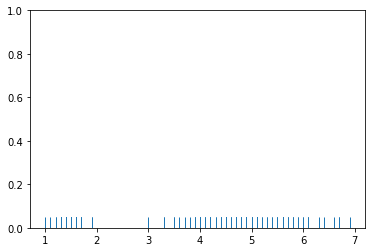

In [9]:
# rugplot : 데이터 위치를 x축 위에 작은 선분으로 나타내 실제 데이터 위치 보여줌
x = iris.petal_length.values

sns.rugplot(x) # iris 데이터 중, 꽃잎 길이에 대한 rugplot
plt.show()

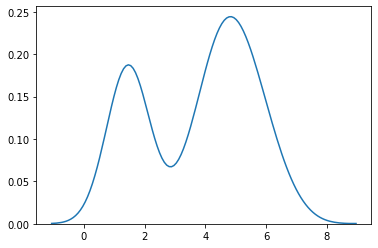

In [10]:
# 커널 밀도
sns.kdeplot(x)
# "Iris 데이터 중, 꽃잎의 길이에 대한 Kernel Density Plot"
plt.show()

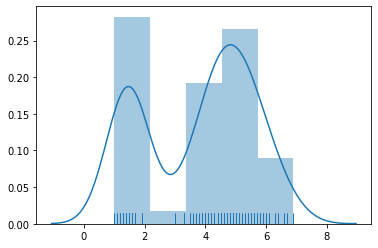

In [12]:
# distplot 은 러그와 커널 밀도 표시 기능이 있어서 hist보다 많이 사용됨
sns.distplot(x, kde=True, rug=True)
# "Iris 데이터 중, 꽃잎의 길이에 대한 Dist Plot"
plt.show()

카운트 플롯

In [13]:
# countplot : 카테고리 값별로 데이터가 얼마나 있는지 표시

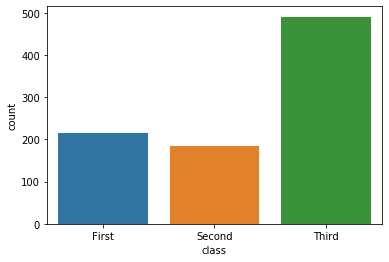

In [14]:
sns.countplot(x="class", data=titanic)
# "타이타닉호의 각 클래스별, 승객 수"
plt.show()

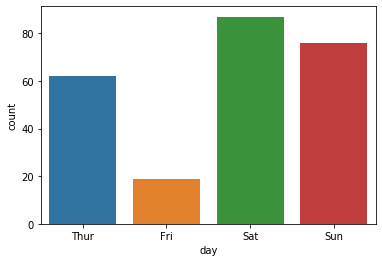

In [16]:
sns.countplot(x="day", data=tips)
# 요일별 팁을 준 횟수
plt.show()

다차원 데이터

In [17]:
# 데이터가 2차원이고 연속적인 실수값이라면 스캐터 플롯 사용
# joinplot

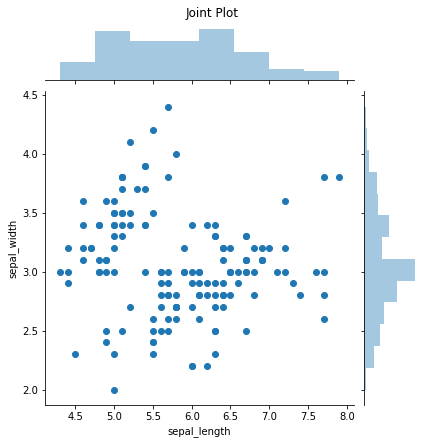

In [20]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris)
# 꽃받침의 길이와 넓이
plt.suptitle("Joint Plot", y=1.02)
plt.show()

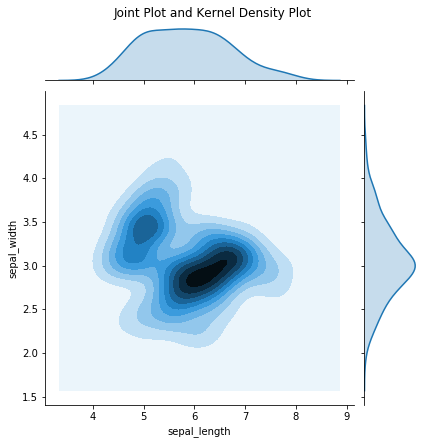

In [21]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind="kde")
# kind = kde : 커널 밀도 히스토그램
plt.suptitle("Joint Plot and Kernel Density Plot", y=1.02)
plt.show()

다차원 실수형 (2차원x)

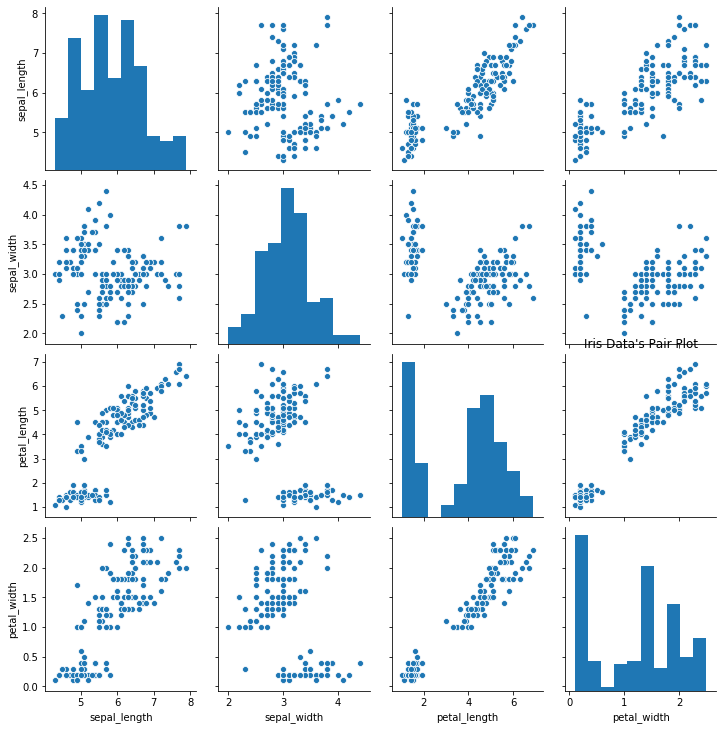

In [22]:
sns.pairplot(iris)
plt.title("Iris Data's Pair Plot") # 같은 데이터가 만나는 곳 히스토그램
plt.show()

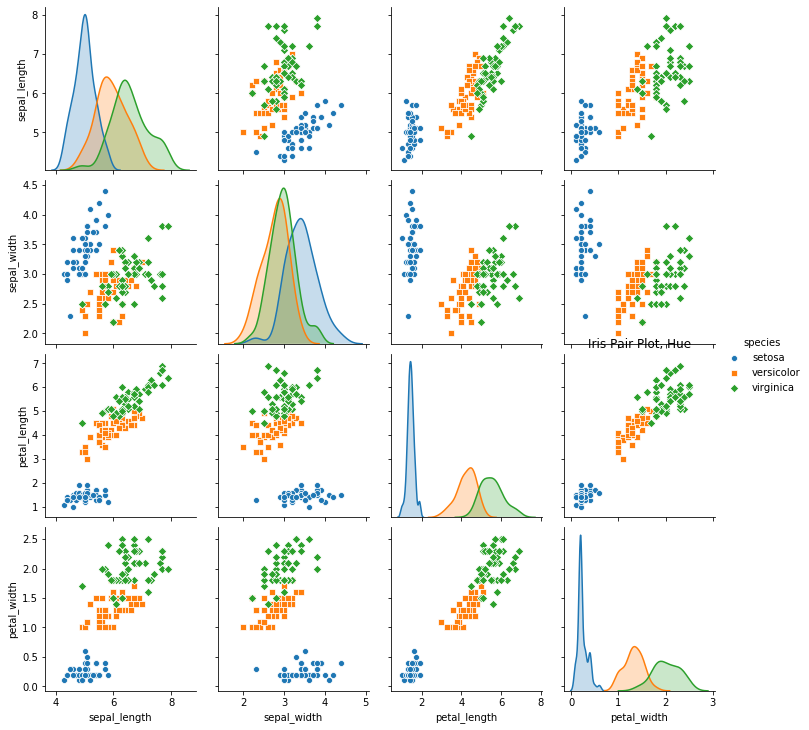

In [25]:
# 카테고리형 데이터가 섞여있는 경우 hue인수에 카테고리 변수이름 지정
sns.pairplot(iris, hue="species", markers=["o", "s", "D"])
plt.title("Iris Pair Plot, Hue")
plt.show()

2차원 카테고리 데이터

In [26]:
# 데이터가 2차원이고 모든 값이 카테고리라면 heatmap 사용

In [27]:
titanic_size = titanic.pivot_table(
    index="class", columns="sex", aggfunc="size")
titanic_size

sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


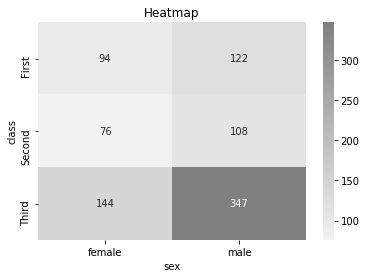

In [28]:
sns.heatmap(titanic_size, cmap=sns.light_palette(
    "gray", as_cmap=True), annot=True, fmt="d")
plt.title("Heatmap")
plt.show()

2차원 복합 데이터

In [30]:
#데이터가 2차원이고 실수값, 카테고리값이 섞여있을때

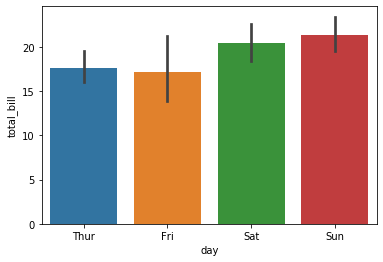

In [31]:
# barplot
sns.barplot(x="day", y="total_bill", data=tips)
# "요일 별, 전체 팁"
plt.show()

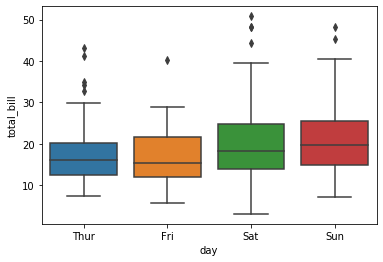

In [32]:
# boxplot
sns.boxplot(x="day", y="total_bill", data=tips)
# "요일 별 전체 팁의 Box Plot"
plt.show()

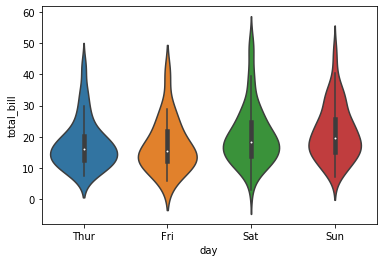

In [33]:
#violinplot : 커널밀도 히스토그램, 대칭
sns.violinplot(x="day", y="total_bill", data=tips)
# "요일 별 전체 팁의 Violin Plot"
plt.show()

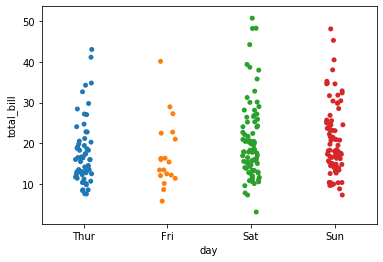

In [35]:
# stripplot : 데이터 점, jitter=True : 가로축상의 위치 바꾸어 데이터 겹치지않게
import numpy as np
np.random.seed(0)
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True)
# "요일 별 전체 팁의 Strip Plot"
plt.show()

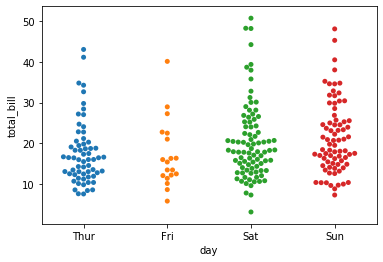

In [36]:
# swarmplot : 데이터 겹치지 않게 옆으로 이동
sns.swarmplot(x="day", y="total_bill", data=tips)
# "요일 별 전체 팁의 Swarm Plot"
plt.show()

다차원 복합 데이터

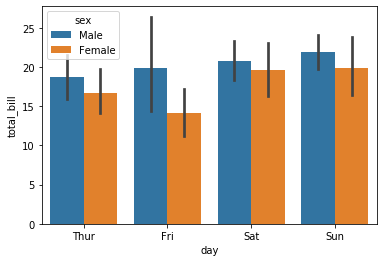

In [37]:
sns.barplot(x="day", y="total_bill", hue="sex", data=tips)
# "요일 별, 성별 전체 팁의 Histogram"
plt.show()

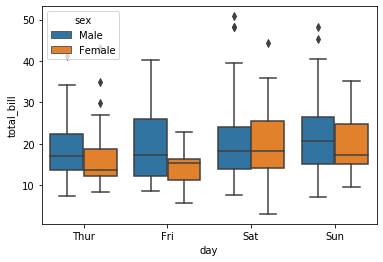

In [38]:
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips)
# "요일 별, 성별 전체 팁의 Box Plot"
plt.show()

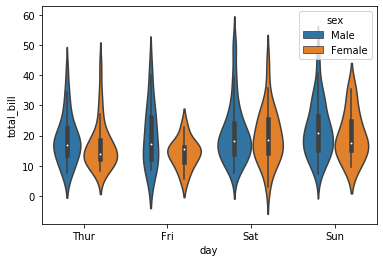

In [40]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips)
# plt.title("요일 별, 성별 전체 팁의 Violin Plot")
plt.show()

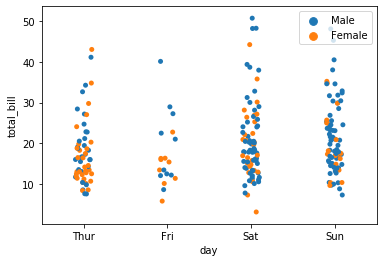

In [41]:
np.random.seed(0)
sns.stripplot(x="day", y="total_bill", hue="sex", data=tips, jitter=True)
# plt.title("요일 별, 성별 전체 팁의 Strip Plot")
plt.legend(loc=1)
plt.show()

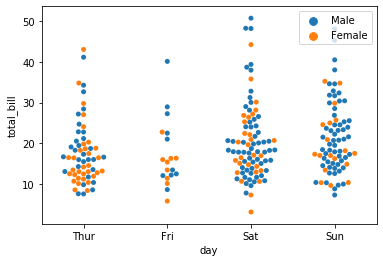

In [43]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips)
# plt.title("요일 별, 성별 전체 팁의 Swarm Plot")
plt.legend(loc=1)
plt.show()

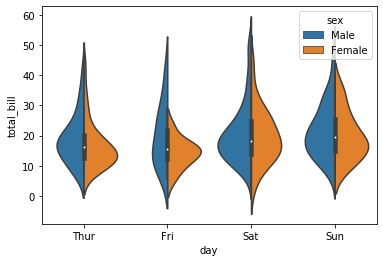

In [44]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True)
# plt.title("요일 별, 성별 전체 팁의 Violin Plot, Split=True")
plt.show()
# split or dodge 옵션으로 시각화 방법 변경가능

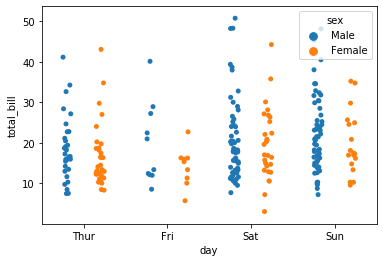

In [46]:
sns.stripplot(x="day", y="total_bill", hue="sex",
              data=tips, jitter=True, dodge=True)
# plt.title("요일 별, 성별 전체 팁의 Strip Plot, Split=True")
plt.show()

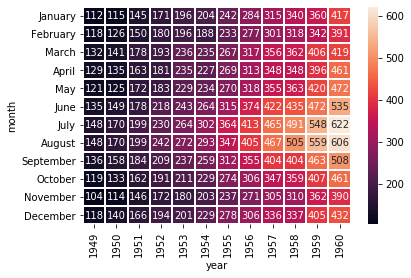

In [47]:
flights_passengers = flights.pivot("month", "year", "passengers")
# plt.title("연도, 월 별 승객수에 대한 Heatmap")
sns.heatmap(flights_passengers, annot=True, fmt="d", linewidths=1)
plt.show()

catplot

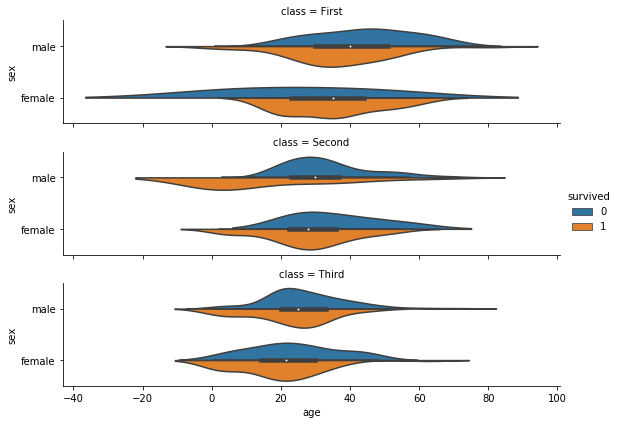

In [48]:
# 3개 이상의 카테고리 값에 의한 분포 보여줌
data = titanic[titanic.survived.notnull()]
sns.catplot(x="age", y="sex", hue="survived", row="class", data=data,
            kind="violin", split=True, height=2, aspect=4)
# plt.title("각 클래스의 성별 생존자 수의 Catplot")
plt.show()

기타

In [49]:
# 시각화를 높이기 위해 여러종류의 차트를 겹쳐서 표현 가능

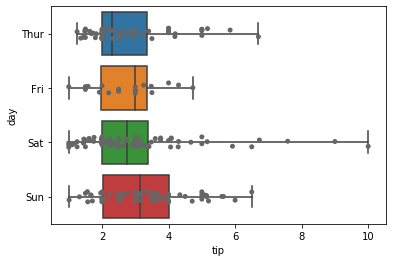

In [50]:
# plt.title("Boxplot과 Strip Plot로 표현한, 요일 별 팁")
sns.boxplot(x="tip", y="day", data=tips, whis=np.inf)
sns.stripplot(x="tip", y="day", data=tips, jitter=True, color="0.4")
plt.show()

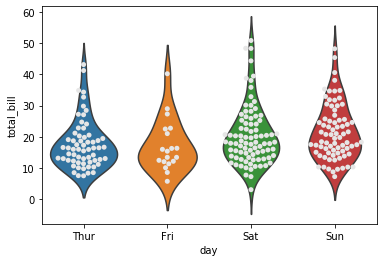

In [51]:
# plt.title("Violin plot과 Swarm Plot로 표현한, 요일 별 팁")
sns.violinplot(x="day", y="total_bill", data=tips, inner=None)
sns.swarmplot(x="day", y="total_bill", data=tips, color="0.9")
plt.show()

스타일

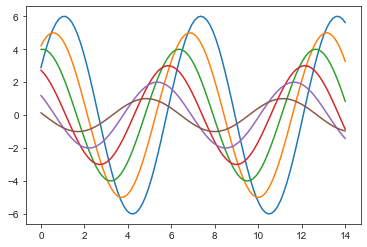

In [52]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)
sns.set_style("ticks") 
#  darkgrid, whitegrid, dark, white, ticks
sinplot()

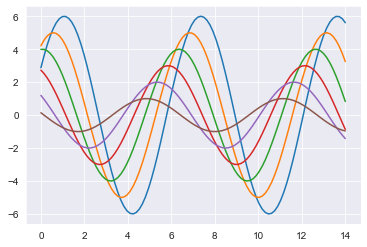

In [53]:
sns.set_style("darkgrid")
sinplot()